In [1]:
import sys
import ast
import json
from transformers import BigBirdPegasusForConditionalGeneration, AutoTokenizer
import sys
import pickle
from rouge_score import rouge_scorer
from rouge_score import scoring
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy.stats import ttest_ind

## Baseline: Bigbird-pegasus fine tuned on the pubmed dataset with standard pubmed data

In [2]:
pubmed_results_df = pd.read_csv('../results/baseline_results/bigbird_baseline_summaries.csv')
pubmed_results_df.head()

,reference,prediction
0,<S> backgroundthe questionnaire for verifying ...,<s> there is an epidemic of stroke in low and ...
1,<S> backgroundthe harmful effects of medicatio...,<s> backgroundmost pregnant women will likely ...
2,<S> background : nickel - titanium ( ni - ti )...,<s> aim : the aim of this study was to evaluat...
3,<S> are chimpanzees synaesthetic ? an affirm...,<s> crossmodal correspondences between sensory...
4,<S> we report a case of a 34-year - old woman ...,<s> erythema multiforme ( em ) is an acute sel...


In [3]:
# rank summaries
r1 = []
r2 = []
rlsum = []
# initialize scorer
scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeLsum"], use_stemmer=True)
# iterate and score each document
for i in range(len(pubmed_results_df)):
    pred = pubmed_results_df.prediction[i]
    ref = pubmed_results_df.reference[i]
    score = scorer.score(ref, pred)
    r1.append(score['rouge1'].fmeasure)
    r2.append(score['rouge2'].fmeasure)
    rlsum.append(score['rougeLsum'].fmeasure)
# add scores to dataframe
pubmed_results_df['r1'] = r1
pubmed_results_df['r2'] = r2
pubmed_results_df['rlsum'] = rlsum

In [4]:
pubmed_results_df.describe()

,r1,r2,rlsum
count,600.000000,600.000000,600.000000
mean,0.421630,0.174779,0.261368
std,0.110264,0.125558,0.117355
min,0.128000,0.000000,0.088000
25%,0.352618,0.097655,0.191304
50%,0.420344,0.149080,0.231327
75%,0.481950,0.218258,0.294966
max,0.968661,0.939828,0.968661


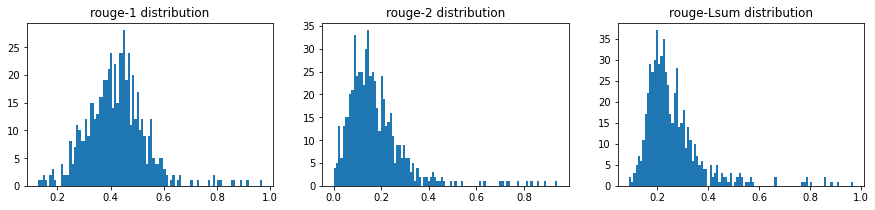

In [5]:
# plot distributions for each metric
fig, ax = plt.subplots(1,3,figsize=(15,3))
ax[0].hist(pubmed_results_df['r1'], bins=100)
ax[0].set_title('rouge-1 distribution')
ax[1].hist(pubmed_results_df['r2'], bins=100)
ax[1].set_title('rouge-2 distribution')
ax[2].hist(pubmed_results_df['rlsum'], bins=100)
ax[2].set_title('rouge-Lsum distribution')
pass

## Experimeriment 1:  Bigbird-pegasus fine tuned on the pubmed dataset with ranked pubmed data

In [6]:
ranked_pubmed_results_df = pd.read_csv('../results/re_ordered_results/lexrank_ranked_bigbird_summaries.csv')
ranked_pubmed_results_df.head()

,reference,prediction
0,<S> backgroundthe questionnaire for verifying ...,<s> we propose to validate the 8-item question...
1,<S> backgroundthe harmful effects of medicatio...,<s> objective : to assess the exposure of preg...
2,<S> background : nickel - titanium ( ni - ti )...,<s> aim : the aim of the present study was to ...
3,<S> are chimpanzees synaesthetic ? an affirm...,<s> crossmodal matches between distinct sensor...
4,<S> we report a case of a 34-year - old woman ...,<s> background : erythema multiforme ( em ) is...


In [7]:
# rank summaries
r1 = []
r2 = []
rlsum = []
# initialize scorer
scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeLsum"], use_stemmer=True)
# iterate and score each document
for i in range(len(ranked_pubmed_results_df)):
    pred = ranked_pubmed_results_df.prediction[i]
    ref = ranked_pubmed_results_df.reference[i]
    score = scorer.score(ref, pred)
    r1.append(score['rouge1'].fmeasure)
    r2.append(score['rouge2'].fmeasure)
    rlsum.append(score['rougeLsum'].fmeasure)
# add scores to dataframe
ranked_pubmed_results_df['r1'] = r1
ranked_pubmed_results_df['r2'] = r2
ranked_pubmed_results_df['rlsum'] = rlsum

In [8]:
ranked_pubmed_results_df.describe()

,r1,r2,rlsum
count,600.000000,600.000000,600.000000
mean,0.426065,0.172420,0.258772
std,0.095519,0.094383,0.083973
min,0.146119,0.000000,0.104308
25%,0.363501,0.101266,0.198436
50%,0.431465,0.158094,0.242834
75%,0.493303,0.230240,0.306355
max,0.686217,0.560472,0.651026


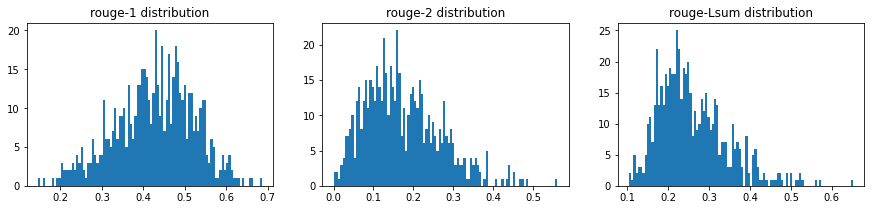

In [11]:
# plot distributions for each metric
fig, ax = plt.subplots(1,3,figsize=(15,3))
ax[0].hist(ranked_pubmed_results_df['r1'], bins=100)
ax[0].set_title('rouge-1 distribution')
ax[1].hist(ranked_pubmed_results_df['r2'], bins=100)
ax[1].set_title('rouge-2 distribution')
ax[2].hist(ranked_pubmed_results_df['rlsum'], bins=100)
ax[2].set_title('rouge-Lsum distribution')
pass

## Experimeriment 2:  Bigbird-pegasus fine tuned on the pubmed dataset with ranked and temporally aligned pubmed data

In [12]:
ranked_temporal_pubmed_results_df = pd.read_csv('../results/re_ordered_temporal_results/temporal_truncated_summaries.csv')
ranked_temporal_pubmed_results_df.head()

,reference,prediction
0,<S> backgroundthe questionnaire for verifying ...,<s> there is an epidemic of stroke in low and ...
1,<S> backgroundthe harmful effects of medicatio...,<s> objectives : to assess risky exposure of p...
2,<S> background : nickel - titanium ( ni - ti )...,<s> aim : the aim of this study was to evaluat...
3,<S> are chimpanzees synaesthetic ? an affirm...,"<s> ludwig, adachi, and matzuzawa ( 2011 ) rec..."
4,<S> we report a case of a 34-year - old woman ...,<s> erythema multiforme ( em ) is an acute sel...


In [13]:
# rank summaries
r1 = []
r2 = []
rlsum = []
# initialize scorer
scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeLsum"], use_stemmer=True)
# iterate and score each document
for i in range(len(ranked_temporal_pubmed_results_df)):
    pred = ranked_temporal_pubmed_results_df.prediction[i]
    ref = ranked_temporal_pubmed_results_df.reference[i]
    score = scorer.score(ref, pred)
    r1.append(score['rouge1'].fmeasure)
    r2.append(score['rouge2'].fmeasure)
    rlsum.append(score['rougeLsum'].fmeasure)
# add scores to dataframe
ranked_temporal_pubmed_results_df['r1'] = r1
ranked_temporal_pubmed_results_df['r2'] = r2
ranked_temporal_pubmed_results_df['rlsum'] = rlsum

In [14]:
ranked_temporal_pubmed_results_df.describe()

,r1,r2,rlsum
count,600.000000,600.000000,600.000000
mean,0.425074,0.180150,0.264879
std,0.108197,0.126671,0.118415
min,0.109804,0.000000,0.092664
25%,0.361473,0.102347,0.196085
50%,0.426553,0.157320,0.237714
75%,0.480044,0.218668,0.292901
max,0.931818,0.891429,0.931818


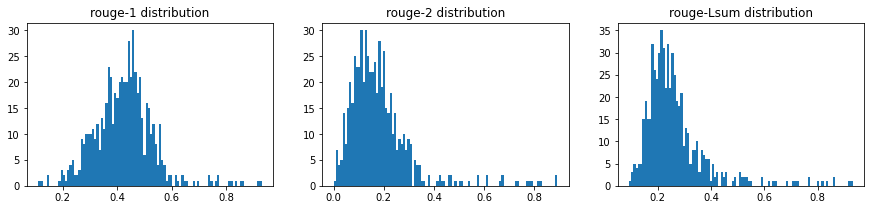

In [15]:
# plot distributions for each metric
fig, ax = plt.subplots(1,3,figsize=(15,3))
ax[0].hist(ranked_temporal_pubmed_results_df['r1'], bins=100)
ax[0].set_title('rouge-1 distribution')
ax[1].hist(ranked_temporal_pubmed_results_df['r2'], bins=100)
ax[1].set_title('rouge-2 distribution')
ax[2].hist(ranked_temporal_pubmed_results_df['rlsum'], bins=100)
ax[2].set_title('rouge-Lsum distribution')
pass

## Statistical tests, and distribution overlay (ranked vs original)

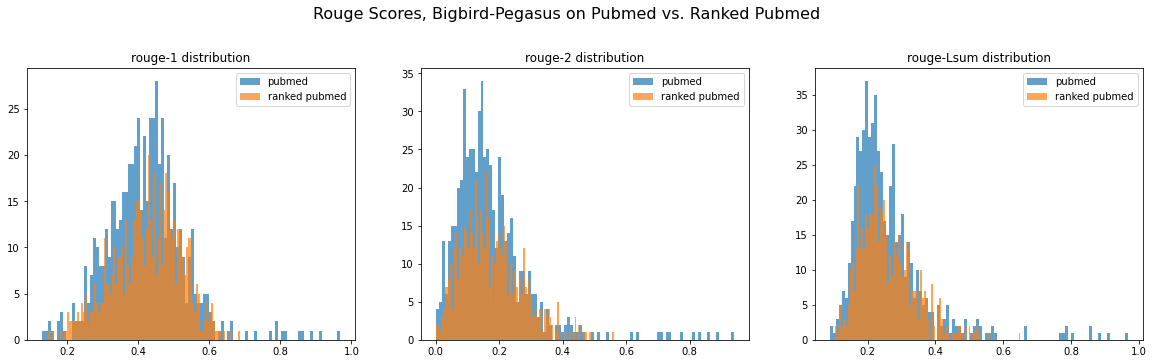

In [16]:
# plot distributions for each metric
fig, ax = plt.subplots(1,3,figsize=(20,5))
kwargs = {'alpha':0.7, 'bins':100}
ax[0].hist(pubmed_results_df['r1'], **kwargs, label='pubmed')
ax[0].hist(ranked_pubmed_results_df['r1'], **kwargs, label='ranked pubmed')
ax[0].legend()
ax[0].set_title('rouge-1 distribution')
ax[1].hist(pubmed_results_df['r2'], **kwargs, label='pubmed')
ax[1].hist(ranked_pubmed_results_df['r2'], **kwargs, label='ranked pubmed')
ax[1].set_title('rouge-2 distribution')
ax[1].legend()
ax[2].hist(pubmed_results_df['rlsum'], **kwargs, label='pubmed')
ax[2].hist(ranked_pubmed_results_df['rlsum'], **kwargs, label='ranked pubmed')
ax[2].set_title('rouge-Lsum distribution')
ax[2].legend()
plt.suptitle('Rouge Scores, Bigbird-Pegasus on Pubmed vs. Ranked Pubmed', y=1.05, size=16)
pass

In [58]:
# t-tests
print('overall:')
df1 = pubmed_results_df
df2 = ranked_pubmed_results_df
r1_pubmed = df1['r1']
r1_ranked = df2['r1']
r1_t_test = ttest_ind(r1_pubmed, r1_ranked, equal_var=False, alternative='two-sided')
print(f'Results for Rouge-1 t-test:\n{r1_t_test}')
print('----')
r2_pubmed = df1['r2']
r2_ranked = df2['r2']
r2_t_test = ttest_ind(r2_pubmed, r2_ranked, equal_var=False, alternative='two-sided')
print(f'Results for Rouge-2 t-test:\n{r2_t_test}')
print('----')
rl_pubmed = df1['rlsum']
rl_ranked = df2['rlsum']
rl_t_test = ttest_ind(rl_pubmed, rl_ranked, equal_var=False, alternative='two-sided')
print(f'Results for Rouge-Lsum t-test:\n{rl_t_test}')
print('\n')

# long documents
print('documents > 4096 tokens:')
df1 = pubmed_results_df[pubmed_results_df['doc_len'] > 4096]
df2 = ranked_pubmed_results_df[ranked_pubmed_results_df['doc_len'] > 4096]
r1_pubmed = df1['r1']
r1_ranked = df2['r1']
r1_t_test = ttest_ind(r1_pubmed, r1_ranked, equal_var=False, alternative='two-sided')
print(f'Results for Rouge-1 t-test:\n{r1_t_test}')
print('----')
r2_pubmed = df1['r2']
r2_ranked = df2['r2']
r2_t_test = ttest_ind(r2_pubmed, r2_ranked, equal_var=False, alternative='two-sided')
print(f'Results for Rouge-2 t-test:\n{r2_t_test}')
print('----')
rl_pubmed = df1['rlsum']
rl_ranked = df2['rlsum']
rl_t_test = ttest_ind(rl_pubmed, rl_ranked, equal_var=False, alternative='two-sided')
print(f'Results for Rouge-Lsum t-test:\n{rl_t_test}')
print('\n')

# short documents
print('documents < 4096 tokens:')
df1 = pubmed_results_df[pubmed_results_df['doc_len'] < 4096]
df2 = ranked_pubmed_results_df[ranked_pubmed_results_df['doc_len'] < 4096]
r1_pubmed = df1['r1']
r1_ranked = df2['r1']
r1_t_test = ttest_ind(r1_pubmed, r1_ranked, equal_var=False, alternative='two-sided')
print(f'Results for Rouge-1 t-test:\n{r1_t_test}')
print('----')
r2_pubmed = df1['r2']
r2_ranked = df2['r2']
r2_t_test = ttest_ind(r2_pubmed, r2_ranked, equal_var=False, alternative='two-sided')
print(f'Results for Rouge-2 t-test:\n{r2_t_test}')
print('----')
rl_pubmed = df1['rlsum']
rl_ranked = df2['rlsum']
rl_t_test = ttest_ind(rl_pubmed, rl_ranked, equal_var=False, alternative='two-sided')
print(f'Results for Rouge-Lsum t-test:\n{rl_t_test}')
print('\n')
print(len(df1))
print(len(df2))

overall:
Results for Rouge-1 t-test:
Ttest_indResult(statistic=-0.7446401448852508, pvalue=0.45663830319803944)
----
Results for Rouge-2 t-test:
Ttest_indResult(statistic=0.3678553007693603, pvalue=0.713051130075342)
----
Results for Rouge-Lsum t-test:
Ttest_indResult(statistic=0.44053817424922875, pvalue=0.6596351248458368)


documents > 4096 tokens:
Results for Rouge-1 t-test:
Ttest_indResult(statistic=-0.7868795071111052, pvalue=0.4317703362564089)
----
Results for Rouge-2 t-test:
Ttest_indResult(statistic=-0.7014104154645745, pvalue=0.483410367601224)
----
Results for Rouge-Lsum t-test:
Ttest_indResult(statistic=-0.7847587721470429, pvalue=0.43300794485694016)


documents < 4096 tokens:
Results for Rouge-1 t-test:
Ttest_indResult(statistic=-0.38045256333959454, pvalue=0.7037242074932197)
----
Results for Rouge-2 t-test:
Ttest_indResult(statistic=0.764044091454924, pvalue=0.4451133616000763)
----
Results for Rouge-Lsum t-test:
Ttest_indResult(statistic=0.9383607774177714, pvalue=0.3

## Statistical tests, and distribution overlay (ranked and temporally aligned vs original)

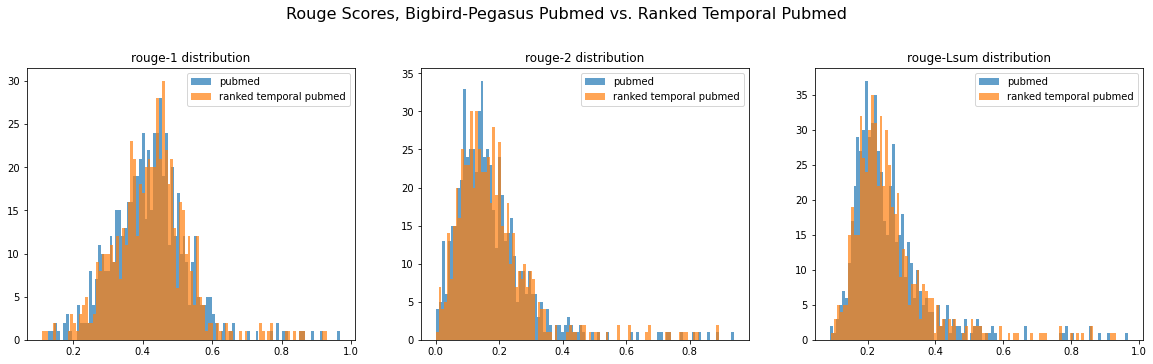

In [18]:
# plot distributions for each metric
fig, ax = plt.subplots(1,3,figsize=(20,5))
kwargs = {'alpha':0.7, 'bins':100}
ax[0].hist(pubmed_results_df['r1'], **kwargs, label='pubmed')
ax[0].hist(ranked_temporal_pubmed_results_df['r1'], **kwargs, label='ranked temporal pubmed')
ax[0].legend()
ax[0].set_title('rouge-1 distribution')
ax[1].hist(pubmed_results_df['r2'], **kwargs, label='pubmed')
ax[1].hist(ranked_temporal_pubmed_results_df['r2'], **kwargs, label='ranked temporal pubmed')
ax[1].set_title('rouge-2 distribution')
ax[1].legend()
ax[2].hist(pubmed_results_df['rlsum'], **kwargs, label='pubmed')
ax[2].hist(ranked_temporal_pubmed_results_df['rlsum'], **kwargs, label='ranked temporal pubmed')
ax[2].set_title('rouge-Lsum distribution')
ax[2].legend()
plt.suptitle('Rouge Scores, Bigbird-Pegasus Pubmed vs. Ranked Temporal Pubmed', y=1.05, size=16)
pass

In [57]:
# t-tests
print('overall:')
df1 = pubmed_results_df
df2 = ranked_temporal_pubmed_results_df
r1_pubmed = df1['r1']
r1_ranked_temporal = df2['r1']
r1_t_test = ttest_ind(r1_pubmed, r1_ranked_temporal, equal_var=False, alternative='two-sided')
print(f'Results for Rouge-1 t-test:\n{r1_t_test}')
print('----')
r2_pubmed = df1['r2']
r2_ranked_temporal = df2['r2']
r2_t_test = ttest_ind(r2_pubmed, r2_ranked_temporal, equal_var=False, alternative='two-sided')
print(f'Results for Rouge-2 t-test:\n{r2_t_test}')
print('----')
rl_pubmed = df1['rlsum']
rl_ranked_temporal = df2['rlsum']
rl_t_test = ttest_ind(rl_pubmed, rl_ranked_temporal, equal_var=False, alternative='two-sided')
print(f'Results for Rouge-Lsum t-test:\n{rl_t_test}')
print('\n')

# long documents
print('documents > 4096 tokens:')
df1 = pubmed_results_df[pubmed_results_df['doc_len'] > 4096]
df2 = ranked_temporal_pubmed_results_df[ranked_temporal_pubmed_results_df['doc_len'] > 4096]
r1_pubmed = df1['r1']
r1_ranked_temporal = df2['r1']
r1_t_test = ttest_ind(r1_pubmed, r1_ranked_temporal, equal_var=False, alternative='two-sided')
print(f'Results for Rouge-1 t-test:\n{r1_t_test}')
print('----')
r2_pubmed = df1['r2']
r2_ranked_temporal = df2['r2']
r2_t_test = ttest_ind(r2_pubmed, r2_ranked_temporal, equal_var=False, alternative='two-sided')
print(f'Results for Rouge-2 t-test:\n{r2_t_test}')
print('----')
rl_pubmed = df1['rlsum']
rl_ranked_temporal = df2['rlsum']
rl_t_test = ttest_ind(rl_pubmed, rl_ranked_temporal, equal_var=False, alternative='two-sided')
print(f'Results for Rouge-Lsum t-test:\n{rl_t_test}')
print('\n')

# short documents
print('documents < 4096 tokens:')
df1 = pubmed_results_df[pubmed_results_df['doc_len'] < 4096]
df2 = ranked_temporal_pubmed_results_df[ranked_temporal_pubmed_results_df['doc_len'] < 4096]
r1_pubmed = df1['r1']
r1_ranked_temporal = df2['r1']
r1_t_test = ttest_ind(r1_pubmed, r1_ranked_temporal, equal_var=False, alternative='two-sided')
print(f'Results for Rouge-1 t-test:\n{r1_t_test}')
print('----')
r2_pubmed = df1['r2']
r2_ranked_temporal = df2['r2']
r2_t_test = ttest_ind(r2_pubmed, r2_ranked_temporal, equal_var=False, alternative='two-sided')
print(f'Results for Rouge-2 t-test:\n{r2_t_test}')
print('----')
rl_pubmed = df1['rlsum']
rl_ranked_temporal = df2['rlsum']
rl_t_test = ttest_ind(rl_pubmed, rl_ranked_temporal, equal_var=False, alternative='two-sided')
print(f'Results for Rouge-Lsum t-test:\n{rl_t_test}')
print('\n')
print(len(df1))
print(len(df2))

overall:
Results for Rouge-1 t-test:
Ttest_indResult(statistic=-0.5461379681103469, pvalue=0.5850728253824249)
----
Results for Rouge-2 t-test:
Ttest_indResult(statistic=-0.7377112839139938, pvalue=0.4608343927886398)
----
Results for Rouge-Lsum t-test:
Ttest_indResult(statistic=-0.5158636254694932, pvalue=0.606044857745587)


documents > 4096 tokens:
Results for Rouge-1 t-test:
Ttest_indResult(statistic=-0.8034756667647743, pvalue=0.42212406987068585)
----
Results for Rouge-2 t-test:
Ttest_indResult(statistic=-1.0026136916463413, pvalue=0.31658610328889975)
----
Results for Rouge-Lsum t-test:
Ttest_indResult(statistic=-0.47551389725280163, pvalue=0.634651631809674)


documents < 4096 tokens:
Results for Rouge-1 t-test:
Ttest_indResult(statistic=-0.17603597986706276, pvalue=0.8603134780055229)
----
Results for Rouge-2 t-test:
Ttest_indResult(statistic=-0.3963085946026876, pvalue=0.6919907363048128)
----
Results for Rouge-Lsum t-test:
Ttest_indResult(statistic=-0.3554773106993199, pvalu

## Evaluation of performance with resepect to document length

In [39]:
# Import test data
with open('../data/mini_val_set_json.txt') as json_file:
    mini_val = json.load(json_file)
mini_val = mini_val['data']

In [40]:
tokenizer = AutoTokenizer.from_pretrained("google/bigbird-pegasus-large-pubmed")
doc_len = []
for i in mini_val:
    input_ = i['article_text']
    length = len(tokenizer(input_, is_split_into_words=True, return_tensors='pt', truncation=False)[0])
    doc_len.append(length)

Token indices sequence length is longer than the specified maximum sequence length for this model (6506 > 4096). Running this sequence through the model will result in indexing errors


In [41]:
pubmed_results_df['doc_len'] = doc_len
ranked_pubmed_results_df['doc_len'] = doc_len
ranked_temporal_pubmed_results_df['doc_len'] = doc_len

r1 coefficient: -2.0096289665500836e-06
r2 coefficient: -3.8966347412232785e-06
rlsum coefficient: -2.6285248684053687e-06

r1 Mean: 0.42162974590540603
r2 Mean: 0.17477887790152452
rlsum Mean: 0.26136778556820206


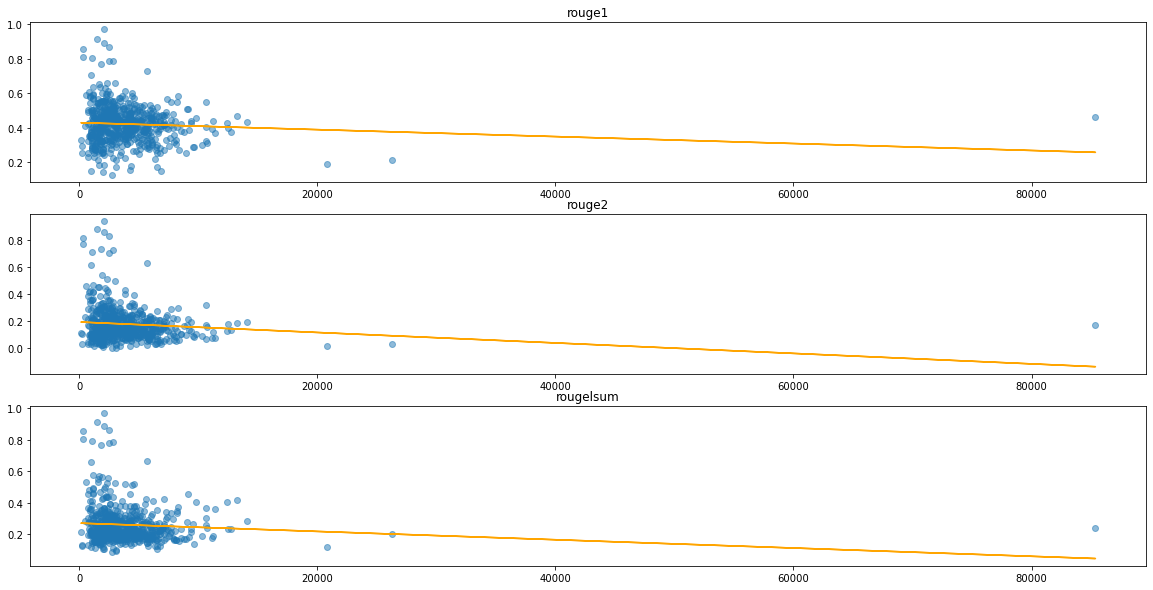

In [45]:
df = pubmed_results_df
fig, axs = plt.subplots(3,1, figsize = (20,10))
axs[0].set_title('rouge1')
axs[0].scatter(df.doc_len, df.r1, alpha=0.5)
m1, b1 = np.polyfit(df.doc_len, df.r1, 1)
axs[0].plot(df.doc_len, m1*df.doc_len + b1, c='orange')

# rouge 2
axs[1].set_title('rouge2')
axs[1].scatter(df.doc_len, df.r2, alpha=0.5)
m4, b4 = np.polyfit(df.doc_len, df.r2, 1)
axs[1].plot(df.doc_len, m4*df.doc_len + b4, c='orange')

# rouge lsum
axs[2].set_title('rougelsum')
axs[2].scatter(df.doc_len, df.rlsum, alpha=0.5)
m7, b7 = np.polyfit(df.doc_len, df.rlsum, 1)
axs[2].plot(df.doc_len, m7*df.doc_len + b7, c='orange')

print(f'r1 coefficient: {m1}')
print(f'r2 coefficient: {m4}')
print(f'rlsum coefficient: {m7}')
print('')
print(f'r1 Mean: {df.r1.mean()}')
print(f'r2 Mean: {df.r2.mean()}')
print(f'rlsum Mean: {df.rlsum.mean()}')

r1 coefficient: -2.6869214157722657e-06
r2 coefficient: -3.4357262609227403e-06
rlsum coefficient: -1.7889035281309428e-06

r1 Mean: 0.4260645921863597
r2 Mean: 0.17241996072818377
rlsum Mean: 0.25877248748716564


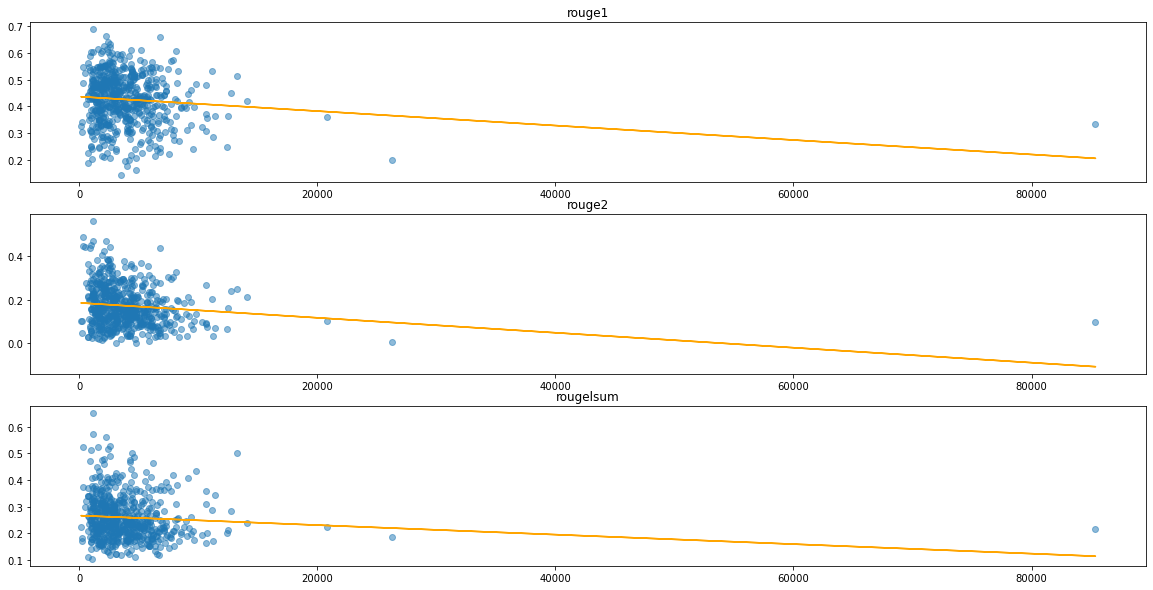

In [46]:
df = ranked_pubmed_results_df
fig, axs = plt.subplots(3,1, figsize = (20,10))
axs[0].set_title('rouge1')
axs[0].scatter(df.doc_len, df.r1, alpha=0.5)
m1, b1 = np.polyfit(df.doc_len, df.r1, 1)
axs[0].plot(df.doc_len, m1*df.doc_len + b1, c='orange')

# rouge 2
axs[1].set_title('rouge2')
axs[1].scatter(df.doc_len, df.r2, alpha=0.5)
m4, b4 = np.polyfit(df.doc_len, df.r2, 1)
axs[1].plot(df.doc_len, m4*df.doc_len + b4, c='orange')

# rouge lsum
axs[2].set_title('rougelsum')
axs[2].scatter(df.doc_len, df.rlsum, alpha=0.5)
m7, b7 = np.polyfit(df.doc_len, df.rlsum, 1)
axs[2].plot(df.doc_len, m7*df.doc_len + b7, c='orange')


print(f'r1 coefficient: {m1}')
print(f'r2 coefficient: {m4}')
print(f'rlsum coefficient: {m7}')
print('')
print(f'r1 Mean: {df.r1.mean()}')
print(f'r2 Mean: {df.r2.mean()}')
print(f'rlsum Mean: {df.rlsum.mean()}')

r1 coefficient: -3.0236554185866167e-06
r2 coefficient: -4.202765228210131e-06
rlsum coefficient: -3.235506331470863e-06

r1 Mean: 0.4250740818936135
r2 Mean: 0.18015037701733444
rlsum Mean: 0.26487884059943434


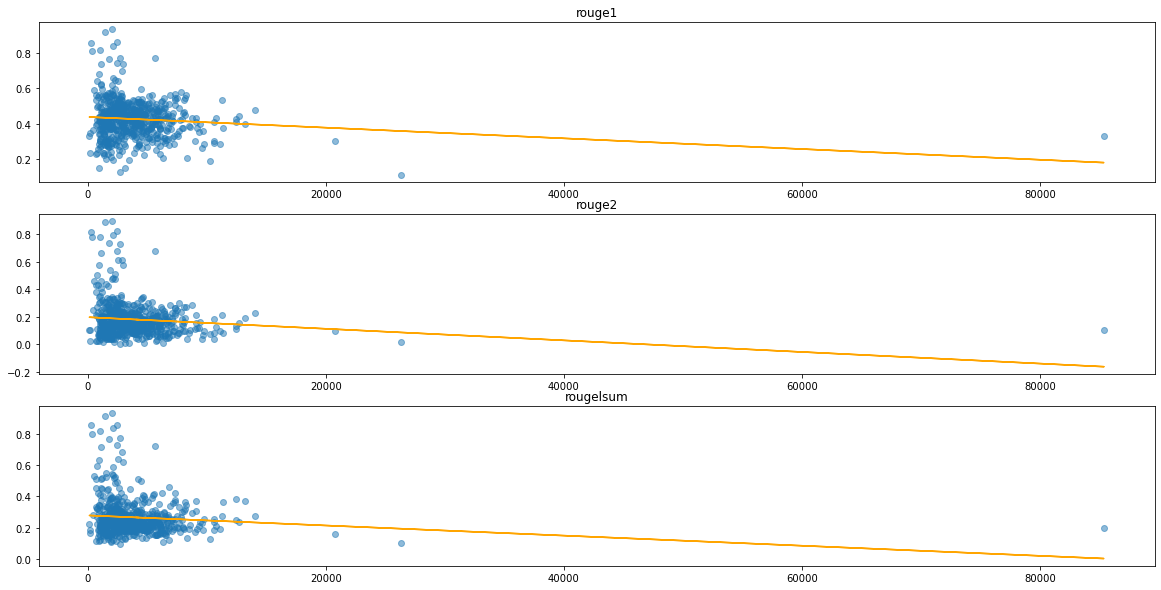

In [47]:
df = ranked_temporal_pubmed_results_df
fig, axs = plt.subplots(3,1, figsize = (20,10))
axs[0].set_title('rouge1')
axs[0].scatter(df.doc_len, df.r1, alpha=0.5)
m1, b1 = np.polyfit(df.doc_len, df.r1, 1)
axs[0].plot(df.doc_len, m1*df.doc_len + b1, c='orange')

# rouge 2
axs[1].set_title('rouge2')
axs[1].scatter(df.doc_len, df.r2, alpha=0.5)
m4, b4 = np.polyfit(df.doc_len, df.r2, 1)
axs[1].plot(df.doc_len, m4*df.doc_len + b4, c='orange')

# rouge lsum
axs[2].set_title('rougelsum')
axs[2].scatter(df.doc_len, df.rlsum, alpha=0.5)
m7, b7 = np.polyfit(df.doc_len, df.rlsum, 1)
axs[2].plot(df.doc_len, m7*df.doc_len + b7, c='orange')


print(f'r1 coefficient: {m1}')
print(f'r2 coefficient: {m4}')
print(f'rlsum coefficient: {m7}')
print('')
print(f'r1 Mean: {df.r1.mean()}')
print(f'r2 Mean: {df.r2.mean()}')
print(f'rlsum Mean: {df.rlsum.mean()}')

# Long Documents (> 4096k)

r1 coefficient: -6.957328337962152e-07
r2 coefficient: -8.030027604622921e-07
rlsum coefficient: -1.3533728297006976e-07

r1 Mean: 0.4059626625103863
r2 Mean: 0.14618281904578997
rlsum Mean: 0.24174838851997124


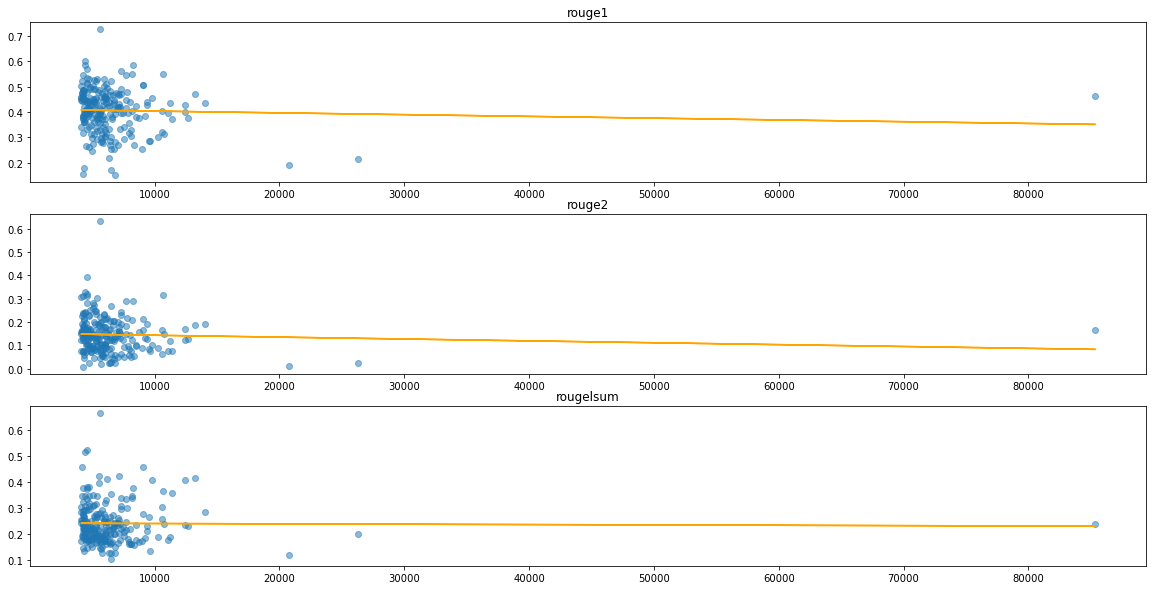

In [49]:
df = pubmed_results_df
df = df[df['doc_len'] > 4096]
fig, axs = plt.subplots(3,1, figsize = (20,10))
axs[0].set_title('rouge1')
axs[0].scatter(df.doc_len, df.r1, alpha=0.5)
m1, b1 = np.polyfit(df.doc_len, df.r1, 1)
axs[0].plot(df.doc_len, m1*df.doc_len + b1, c='orange')

# rouge 2
axs[1].set_title('rouge2')
axs[1].scatter(df.doc_len, df.r2, alpha=0.5)
m4, b4 = np.polyfit(df.doc_len, df.r2, 1)
axs[1].plot(df.doc_len, m4*df.doc_len + b4, c='orange')

# rouge lsum
axs[2].set_title('rougelsum')
axs[2].scatter(df.doc_len, df.rlsum, alpha=0.5)
m7, b7 = np.polyfit(df.doc_len, df.rlsum, 1)
axs[2].plot(df.doc_len, m7*df.doc_len + b7, c='orange')

print(f'r1 coefficient: {m1}')
print(f'r2 coefficient: {m4}')
print(f'rlsum coefficient: {m7}')
print('')
print(f'r1 Mean: {df.r1.mean()}')
print(f'r2 Mean: {df.r2.mean()}')
print(f'rlsum Mean: {df.rlsum.mean()}')

r1 coefficient: -2.048736021728973e-06
r2 coefficient: -1.4532378729633772e-06
rlsum coefficient: -4.7537813499633385e-07

r1 Mean: 0.41272501248082616
r2 Mean: 0.15140309214312156
rlsum Mean: 0.24762830061279653


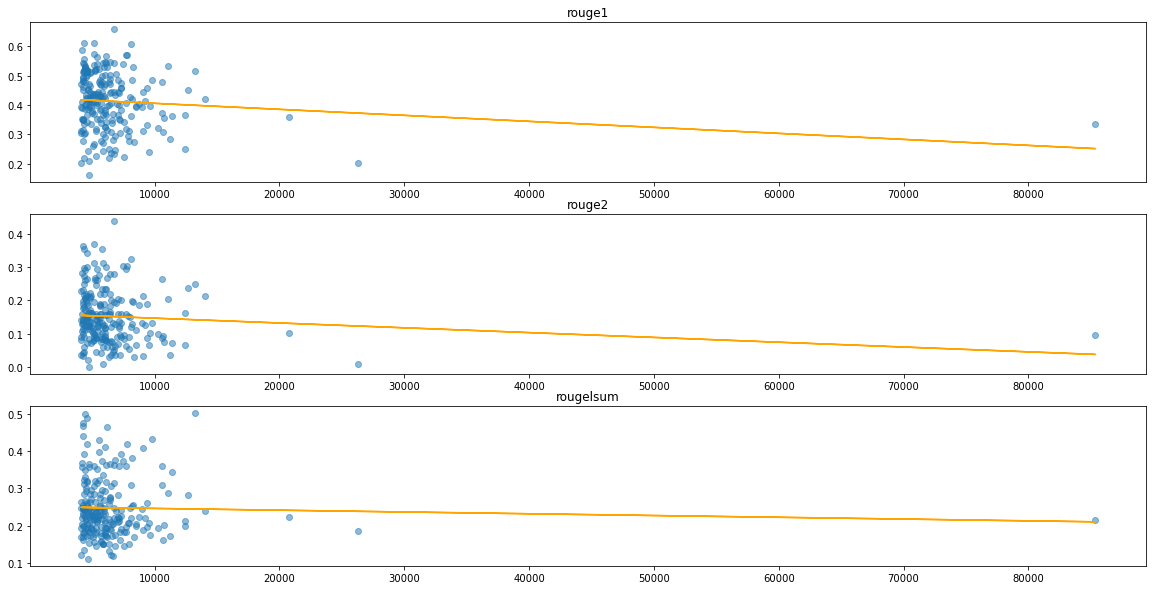

In [50]:
df = ranked_pubmed_results_df
df = df[df['doc_len'] > 4096]
fig, axs = plt.subplots(3,1, figsize = (20,10))
axs[0].set_title('rouge1')
axs[0].scatter(df.doc_len, df.r1, alpha=0.5)
m1, b1 = np.polyfit(df.doc_len, df.r1, 1)
axs[0].plot(df.doc_len, m1*df.doc_len + b1, c='orange')

# rouge 2
axs[1].set_title('rouge2')
axs[1].scatter(df.doc_len, df.r2, alpha=0.5)
m4, b4 = np.polyfit(df.doc_len, df.r2, 1)
axs[1].plot(df.doc_len, m4*df.doc_len + b4, c='orange')

# rouge lsum
axs[2].set_title('rougelsum')
axs[2].scatter(df.doc_len, df.rlsum, alpha=0.5)
m7, b7 = np.polyfit(df.doc_len, df.rlsum, 1)
axs[2].plot(df.doc_len, m7*df.doc_len + b7, c='orange')


print(f'r1 coefficient: {m1}')
print(f'r2 coefficient: {m4}')
print(f'rlsum coefficient: {m7}')
print('')
print(f'r1 Mean: {df.r1.mean()}')
print(f'r2 Mean: {df.r2.mean()}')
print(f'rlsum Mean: {df.rlsum.mean()}')

r1 coefficient: -2.3961063782668538e-06
r2 coefficient: -1.374337625067567e-06
rlsum coefficient: -9.209921827830411e-07

r1 Mean: 0.4125521345150451
r2 Mean: 0.15345901257564426
rlsum Mean: 0.24526322029347467


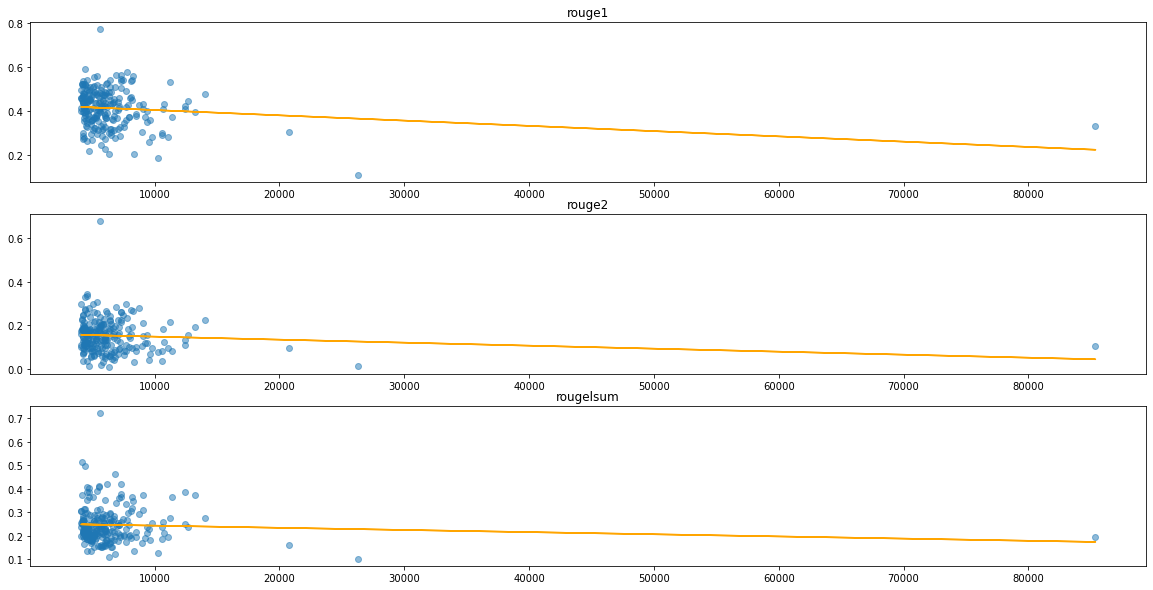

In [51]:
df = ranked_temporal_pubmed_results_df
df = df[df['doc_len'] > 4096]
fig, axs = plt.subplots(3,1, figsize = (20,10))
axs[0].set_title('rouge1')
axs[0].scatter(df.doc_len, df.r1, alpha=0.5)
m1, b1 = np.polyfit(df.doc_len, df.r1, 1)
axs[0].plot(df.doc_len, m1*df.doc_len + b1, c='orange')

# rouge 2
axs[1].set_title('rouge2')
axs[1].scatter(df.doc_len, df.r2, alpha=0.5)
m4, b4 = np.polyfit(df.doc_len, df.r2, 1)
axs[1].plot(df.doc_len, m4*df.doc_len + b4, c='orange')

# rouge lsum
axs[2].set_title('rougelsum')
axs[2].scatter(df.doc_len, df.rlsum, alpha=0.5)
m7, b7 = np.polyfit(df.doc_len, df.rlsum, 1)
axs[2].plot(df.doc_len, m7*df.doc_len + b7, c='orange')


print(f'r1 coefficient: {m1}')
print(f'r2 coefficient: {m4}')
print(f'rlsum coefficient: {m7}')
print('')
print(f'r1 Mean: {df.r1.mean()}')
print(f'r2 Mean: {df.r2.mean()}')
print(f'rlsum Mean: {df.rlsum.mean()}')

# Short documents (< 4096 tokens)

r1 coefficient: -2.0295994480732668e-06
r2 coefficient: -2.1941142035181975e-05
rlsum coefficient: -2.3249798540841416e-05

r1 Mean: 0.43109702089811763
r2 Mean: 0.1920588492956319
rlsum Mean: 0.27322335704654466


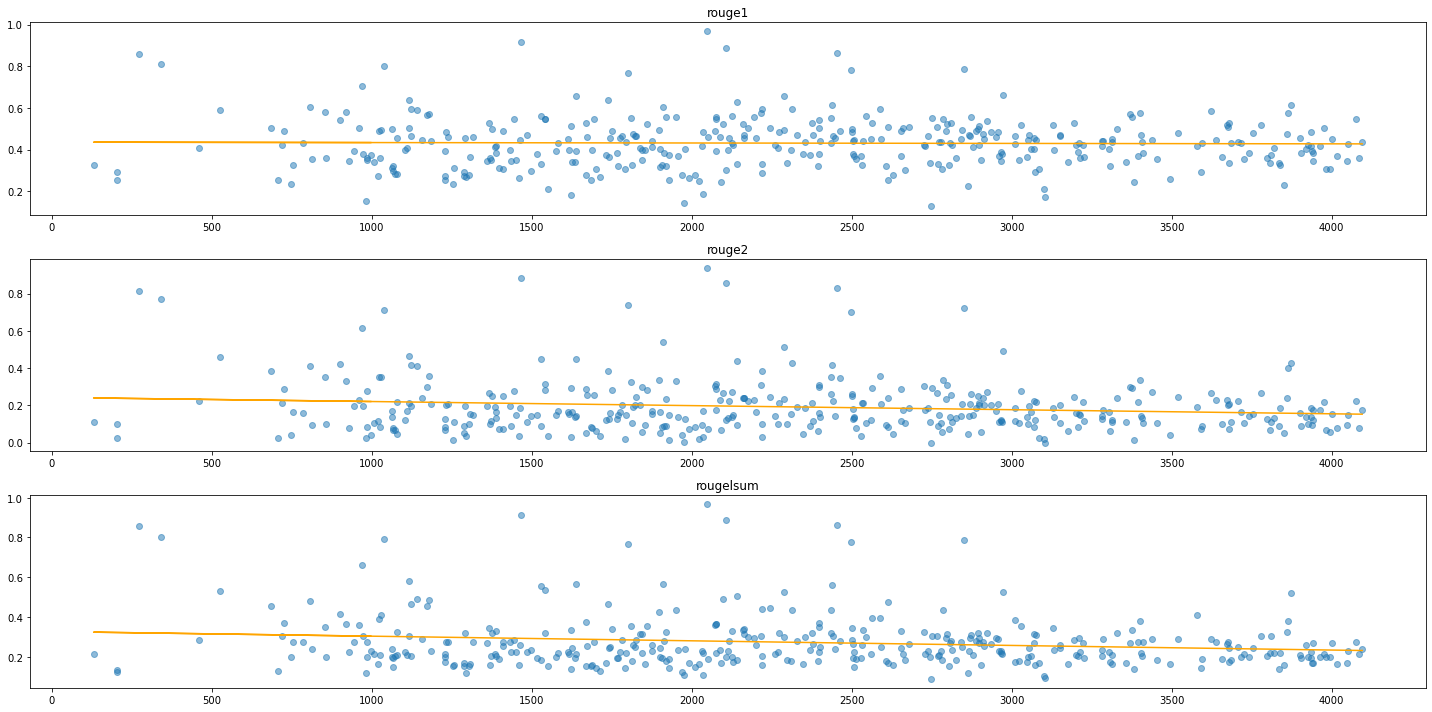

In [52]:
df = pubmed_results_df
df = df[df['doc_len'] < 4096]
fig, axs = plt.subplots(3,1, figsize = (20,10))
axs[0].set_title('rouge1')
axs[0].scatter(df.doc_len, df.r1, alpha=0.5)
m1, b1 = np.polyfit(df.doc_len, df.r1, 1)
axs[0].plot(df.doc_len, m1*df.doc_len + b1, c='orange')

# rouge 2
axs[1].set_title('rouge2')
axs[1].scatter(df.doc_len, df.r2, alpha=0.5)
m4, b4 = np.polyfit(df.doc_len, df.r2, 1)
axs[1].plot(df.doc_len, m4*df.doc_len + b4, c='orange')

# rouge lsum
axs[2].set_title('rougelsum')
axs[2].scatter(df.doc_len, df.rlsum, alpha=0.5)
m7, b7 = np.polyfit(df.doc_len, df.rlsum, 1)
axs[2].plot(df.doc_len, m7*df.doc_len + b7, c='orange')
plt.tight_layout()

print(f'r1 coefficient: {m1}')
print(f'r2 coefficient: {m4}')
print(f'rlsum coefficient: {m7}')
print('')
print(f'r1 Mean: {df.r1.mean()}')
print(f'r2 Mean: {df.r2.mean()}')
print(f'rlsum Mean: {df.rlsum.mean()}')

r1 coefficient: 5.104849683627525e-07
r2 coefficient: -1.4590992456289057e-05
rlsum coefficient: -1.3526709524729101e-05

r1 Mean: 0.434125407730345
r2 Mean: 0.18511999361648357
rlsum Mean: 0.2655066752775604


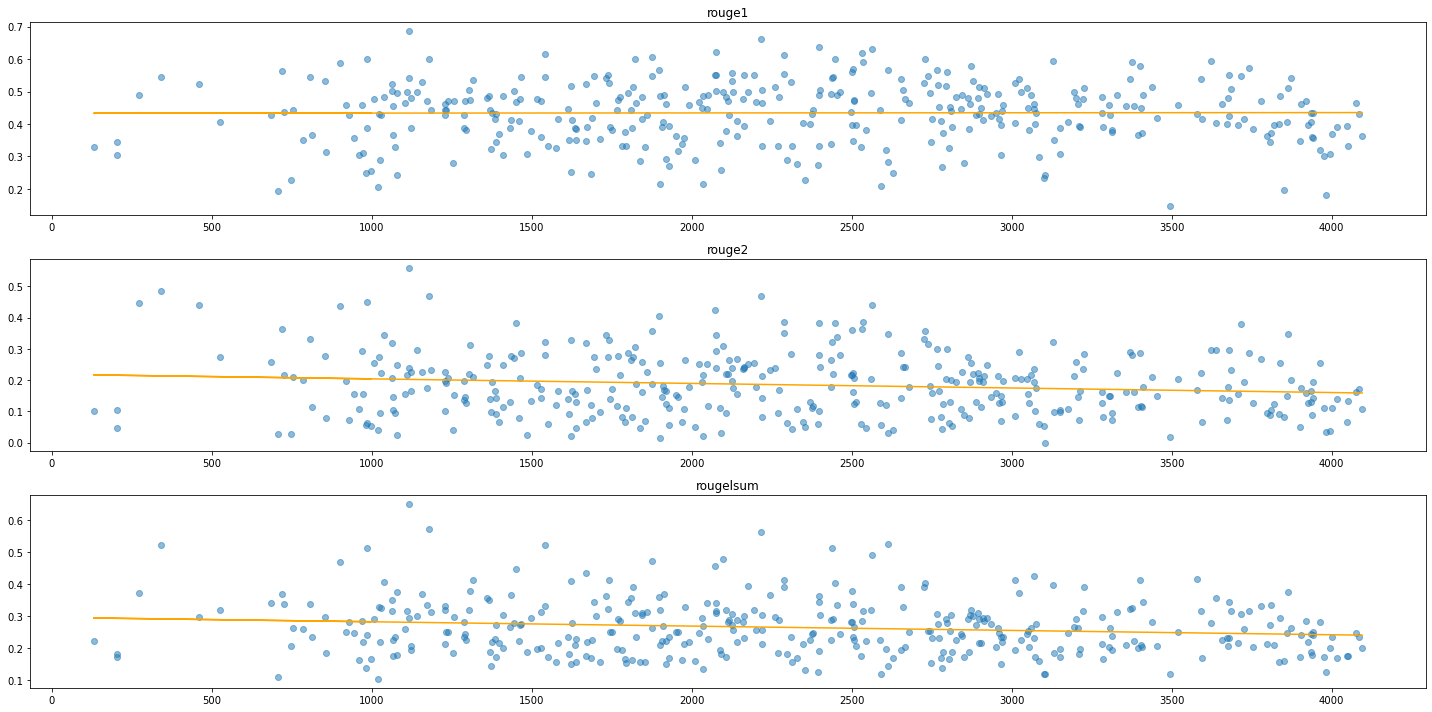

In [53]:
df = ranked_pubmed_results_df
df = df[df['doc_len'] < 4096]
fig, axs = plt.subplots(3,1, figsize = (20,10))
axs[0].set_title('rouge1')
axs[0].scatter(df.doc_len, df.r1, alpha=0.5)
m1, b1 = np.polyfit(df.doc_len, df.r1, 1)
axs[0].plot(df.doc_len, m1*df.doc_len + b1, c='orange')

# rouge 2
axs[1].set_title('rouge2')
axs[1].scatter(df.doc_len, df.r2, alpha=0.5)
m4, b4 = np.polyfit(df.doc_len, df.r2, 1)
axs[1].plot(df.doc_len, m4*df.doc_len + b4, c='orange')

# rouge lsum
axs[2].set_title('rougelsum')
axs[2].scatter(df.doc_len, df.rlsum, alpha=0.5)
m7, b7 = np.polyfit(df.doc_len, df.rlsum, 1)
axs[2].plot(df.doc_len, m7*df.doc_len + b7, c='orange')
plt.tight_layout()

print(f'r1 coefficient: {m1}')
print(f'r2 coefficient: {m4}')
print(f'rlsum coefficient: {m7}')
print('')
print(f'r1 Mean: {df.r1.mean()}')
print(f'r2 Mean: {df.r2.mean()}')
print(f'rlsum Mean: {df.rlsum.mean()}')

r1 coefficient: -4.764589042464962e-06
r2 coefficient: -2.4276097324129485e-05
rlsum coefficient: -2.4659804044345304e-05

r1 Mean: 0.43264082014911126
r2 Mean: 0.19627938333771405
rlsum Mean: 0.27673212987522816


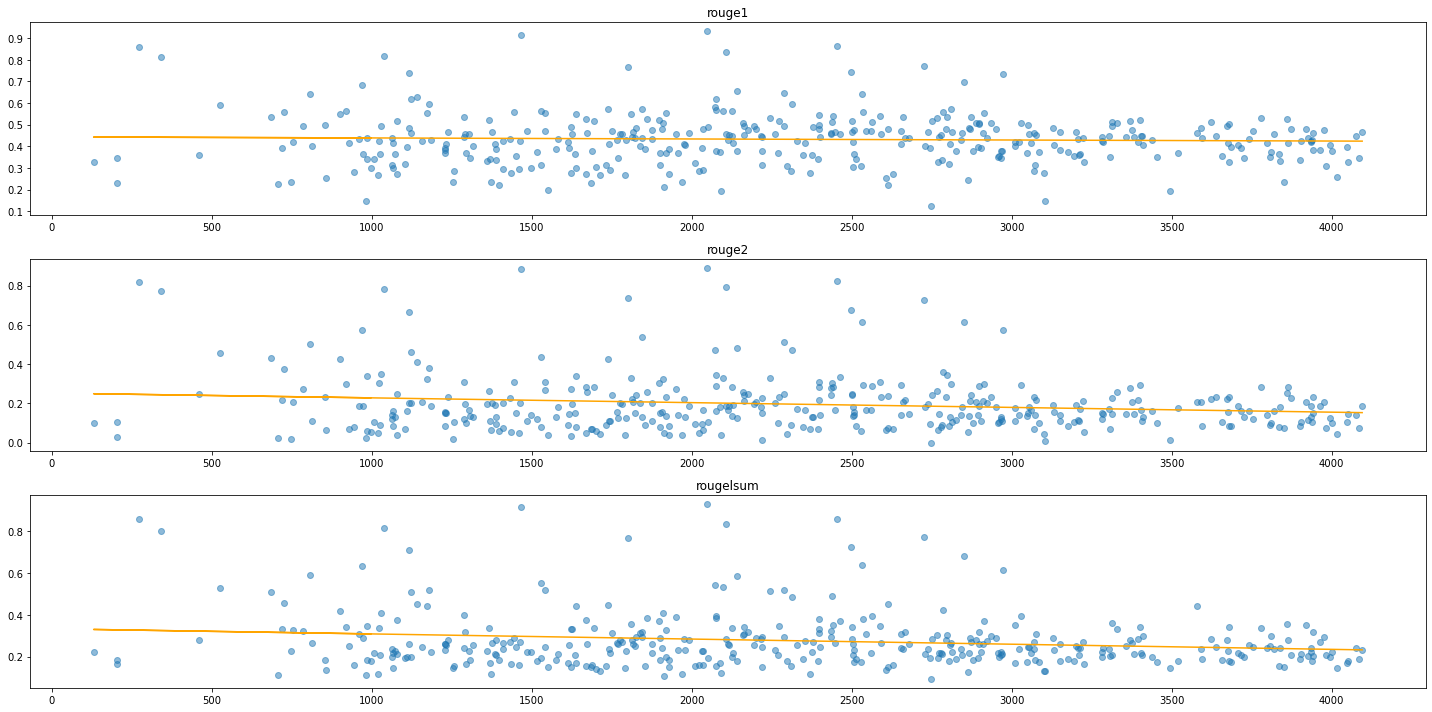

In [54]:
df = ranked_temporal_pubmed_results_df
df = df[df['doc_len'] < 4096]
fig, axs = plt.subplots(3,1, figsize = (20,10))
axs[0].set_title('rouge1')
axs[0].scatter(df.doc_len, df.r1, alpha=0.5)
m1, b1 = np.polyfit(df.doc_len, df.r1, 1)
axs[0].plot(df.doc_len, m1*df.doc_len + b1, c='orange')

# rouge 2
axs[1].set_title('rouge2')
axs[1].scatter(df.doc_len, df.r2, alpha=0.5)
m4, b4 = np.polyfit(df.doc_len, df.r2, 1)
axs[1].plot(df.doc_len, m4*df.doc_len + b4, c='orange')

# rouge lsum
axs[2].set_title('rougelsum')
axs[2].scatter(df.doc_len, df.rlsum, alpha=0.5)
m7, b7 = np.polyfit(df.doc_len, df.rlsum, 1)
axs[2].plot(df.doc_len, m7*df.doc_len + b7, c='orange')
plt.tight_layout()

print(f'r1 coefficient: {m1}')
print(f'r2 coefficient: {m4}')
print(f'rlsum coefficient: {m7}')
print('')
print(f'r1 Mean: {df.r1.mean()}')
print(f'r2 Mean: {df.r2.mean()}')
print(f'rlsum Mean: {df.rlsum.mean()}')